<a href="https://colab.research.google.com/github/md-tanvir-0/Programming_Pythone/blob/main/python_final_project_group_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Student-1
Name: Pial Hasssan Chowdhury
ID# 20-42972-1
```

```
Student-2
Name:MD Tanvir Hossain
ID# 20-42950-1
```



*   Mount your google drive.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Import necessary libraries.



In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import math
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer



•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [ ]:
np.random.seed(123)
df = pd.read_csv('/content/drive/MyDrive/python_finalterm /House_Rent_Dataset.csv')
df = shuffle(df)
print(df)

      BHK   Rent  Size                    Floor    Area Type  \
4733    1   5000   500          Ground out of 1  Carpet Area   
4315    3  32000  1600               3 out of 6   Super Area   
2555    2   5000   500               1 out of 3   Super Area   
440     2   6500   550          Ground out of 1   Super Area   
1370    3  90000   967             14 out of 33  Carpet Area   
...   ...    ...   ...                      ...          ...   
1593    1   7000   100               1 out of 2  Carpet Area   
4060    2  15000  1200               2 out of 3   Super Area   
1346    1  18000   300              3 out of 10   Super Area   
3454    3  20000  1500  Lower Basement out of 1  Carpet Area   
3582    1   7500   500          Ground out of 2   Super Area   

                     Area Locality       City Furnishing Status  \
4733                BN Reddy Nagar  Hyderabad         Furnished   
4315               Raj Bhawan Road  Hyderabad         Furnished   
2555                  Sangam V

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

      BHK   Rent  Size            Floor    Area Type  \
4733    1   5000   500  Ground out of 1  Carpet Area   
4315    3  32000  1600       3 out of 6   Super Area   
2555    2   5000   500       1 out of 3   Super Area   
440     2   6500   550  Ground out of 1   Super Area   
1370    3  90000   967     14 out of 33  Carpet Area   

                     Area Locality       City Furnishing Status  \
4733                BN Reddy Nagar  Hyderabad         Furnished   
4315               Raj Bhawan Road  Hyderabad         Furnished   
2555                  Sangam Vihar      Delhi       Unfurnished   
440                       Kaikhali    Kolkata       Unfurnished   
1370  Romell Aether, Goregaon East     Mumbai         Furnished   

      Tenant Preferred  Bathroom Point of Contact  
4733  Bachelors/Family         1    Contact Owner  
4315  Bachelors/Family         3    Contact Owner  
2555  Bachelors/Family         1    Contact Owner  
440   Bachelors/Family         1    Contact Agent  


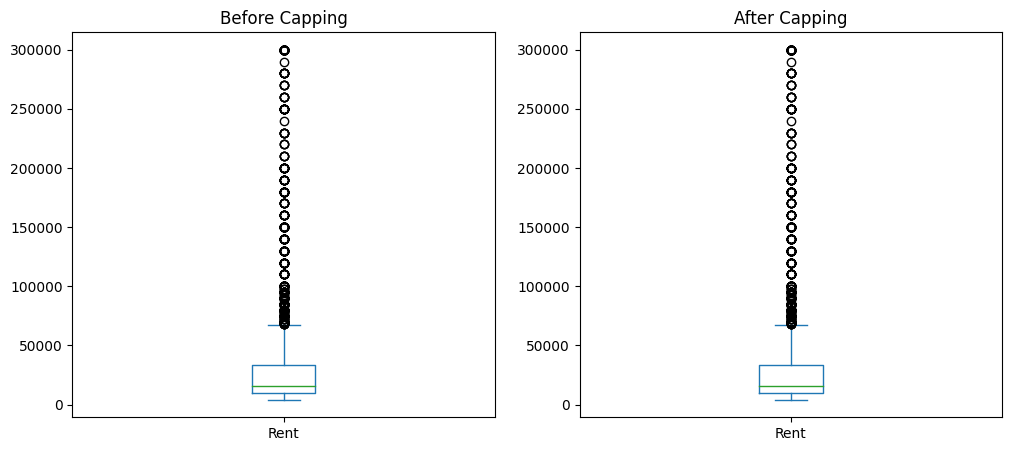

In [ ]:
# write task-2 solution
#------Load and Inspect the Data----------

# Display the first few rows of the dataset to understand its structure and the types of data it contains
print(df.head())

# Get a concise summary of the DataFrame
print(df.info())

# Describe the data to see statistics
print(df.describe(include='all'))

# Check for the number of missing values in each column


#-----Handling Missing Values-----
# For numerical columns
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
#-------- Handling Duplicates------
# Check for duplicates
print("Duplicates before removal:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify removal
print("Duplicates after removal:", df.duplicated().sum())

#----Dealing with Outliers-----
# Capping outliers in 'Rent' column
rent_low = df['Rent'].quantile(0.01)
rent_hi  = df['Rent'].quantile(0.99)
df['Rent'] = df['Rent'].clip(lower=rent_low, upper=rent_hi)

# Capping outliers in 'Size' column
size_low = df['Size'].quantile(0.01)
size_hi  = df['Size'].quantile(0.99)
df['Size'] = df['Size'].clip(lower=size_low, upper=size_hi)

# Capping outliers in 'Bathroom' column
bath_low = df['Bathroom'].quantile(0.01)
bath_hi  = df['Bathroom'].quantile(0.99)
df['Bathroom'] = df['Bathroom'].clip(lower=bath_low, upper=bath_hi)


# Before and after visualization for 'Rent'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['Rent'].plot(kind='box', ax=ax[0], title='Before Capping')
df['Rent'].clip(lower=rent_low, upper=rent_hi).plot(kind='box', ax=ax[1], title='After Capping')
plt.show()






In [ ]:
# Remove rows where any column has NaN
cleaned_data = df.dropna()

# Remove rows where specific columns have NaN
cleaned_data = df.dropna(subset=['BHK', 'Rent', 'Bathroom'])
# Fill NaN with the mean of the column
df['Rent'] = df['Rent'].fillna(df['Rent'].mean())

# Fill NaN with the median of the column
df['Size'] = df['Size'].fillna(df['Size'].median())

# Fill NaN in categorical data with the mode
df['Furnishing Status'] = df['Furnishing Status'].fillna(df['Furnishing Status'].mode()[0])

# Fill NaN with a specific value
df['Bathroom'] = df['Bathroom'].fillna(1)  # Assuming '1' is a sensible default
# Check again for NaN values in the DataFrame
print(df.isnull().sum())
# Convert data types if necessary
df['Bathroom'] = df['Bathroom'].astype(int)  # Convert to int after filling NaNs
df['Rent'] = df['Rent'].astype(float)       # Ensure Rent is a float
# Forward fill
df['Area Locality'] = df['Area Locality'].fillna(method='ffill')

# Backward fill
df['Area Locality'] = df['Area Locality'].fillna(method='bfill')



BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [ ]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data_no_nan.csv', index=False)


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

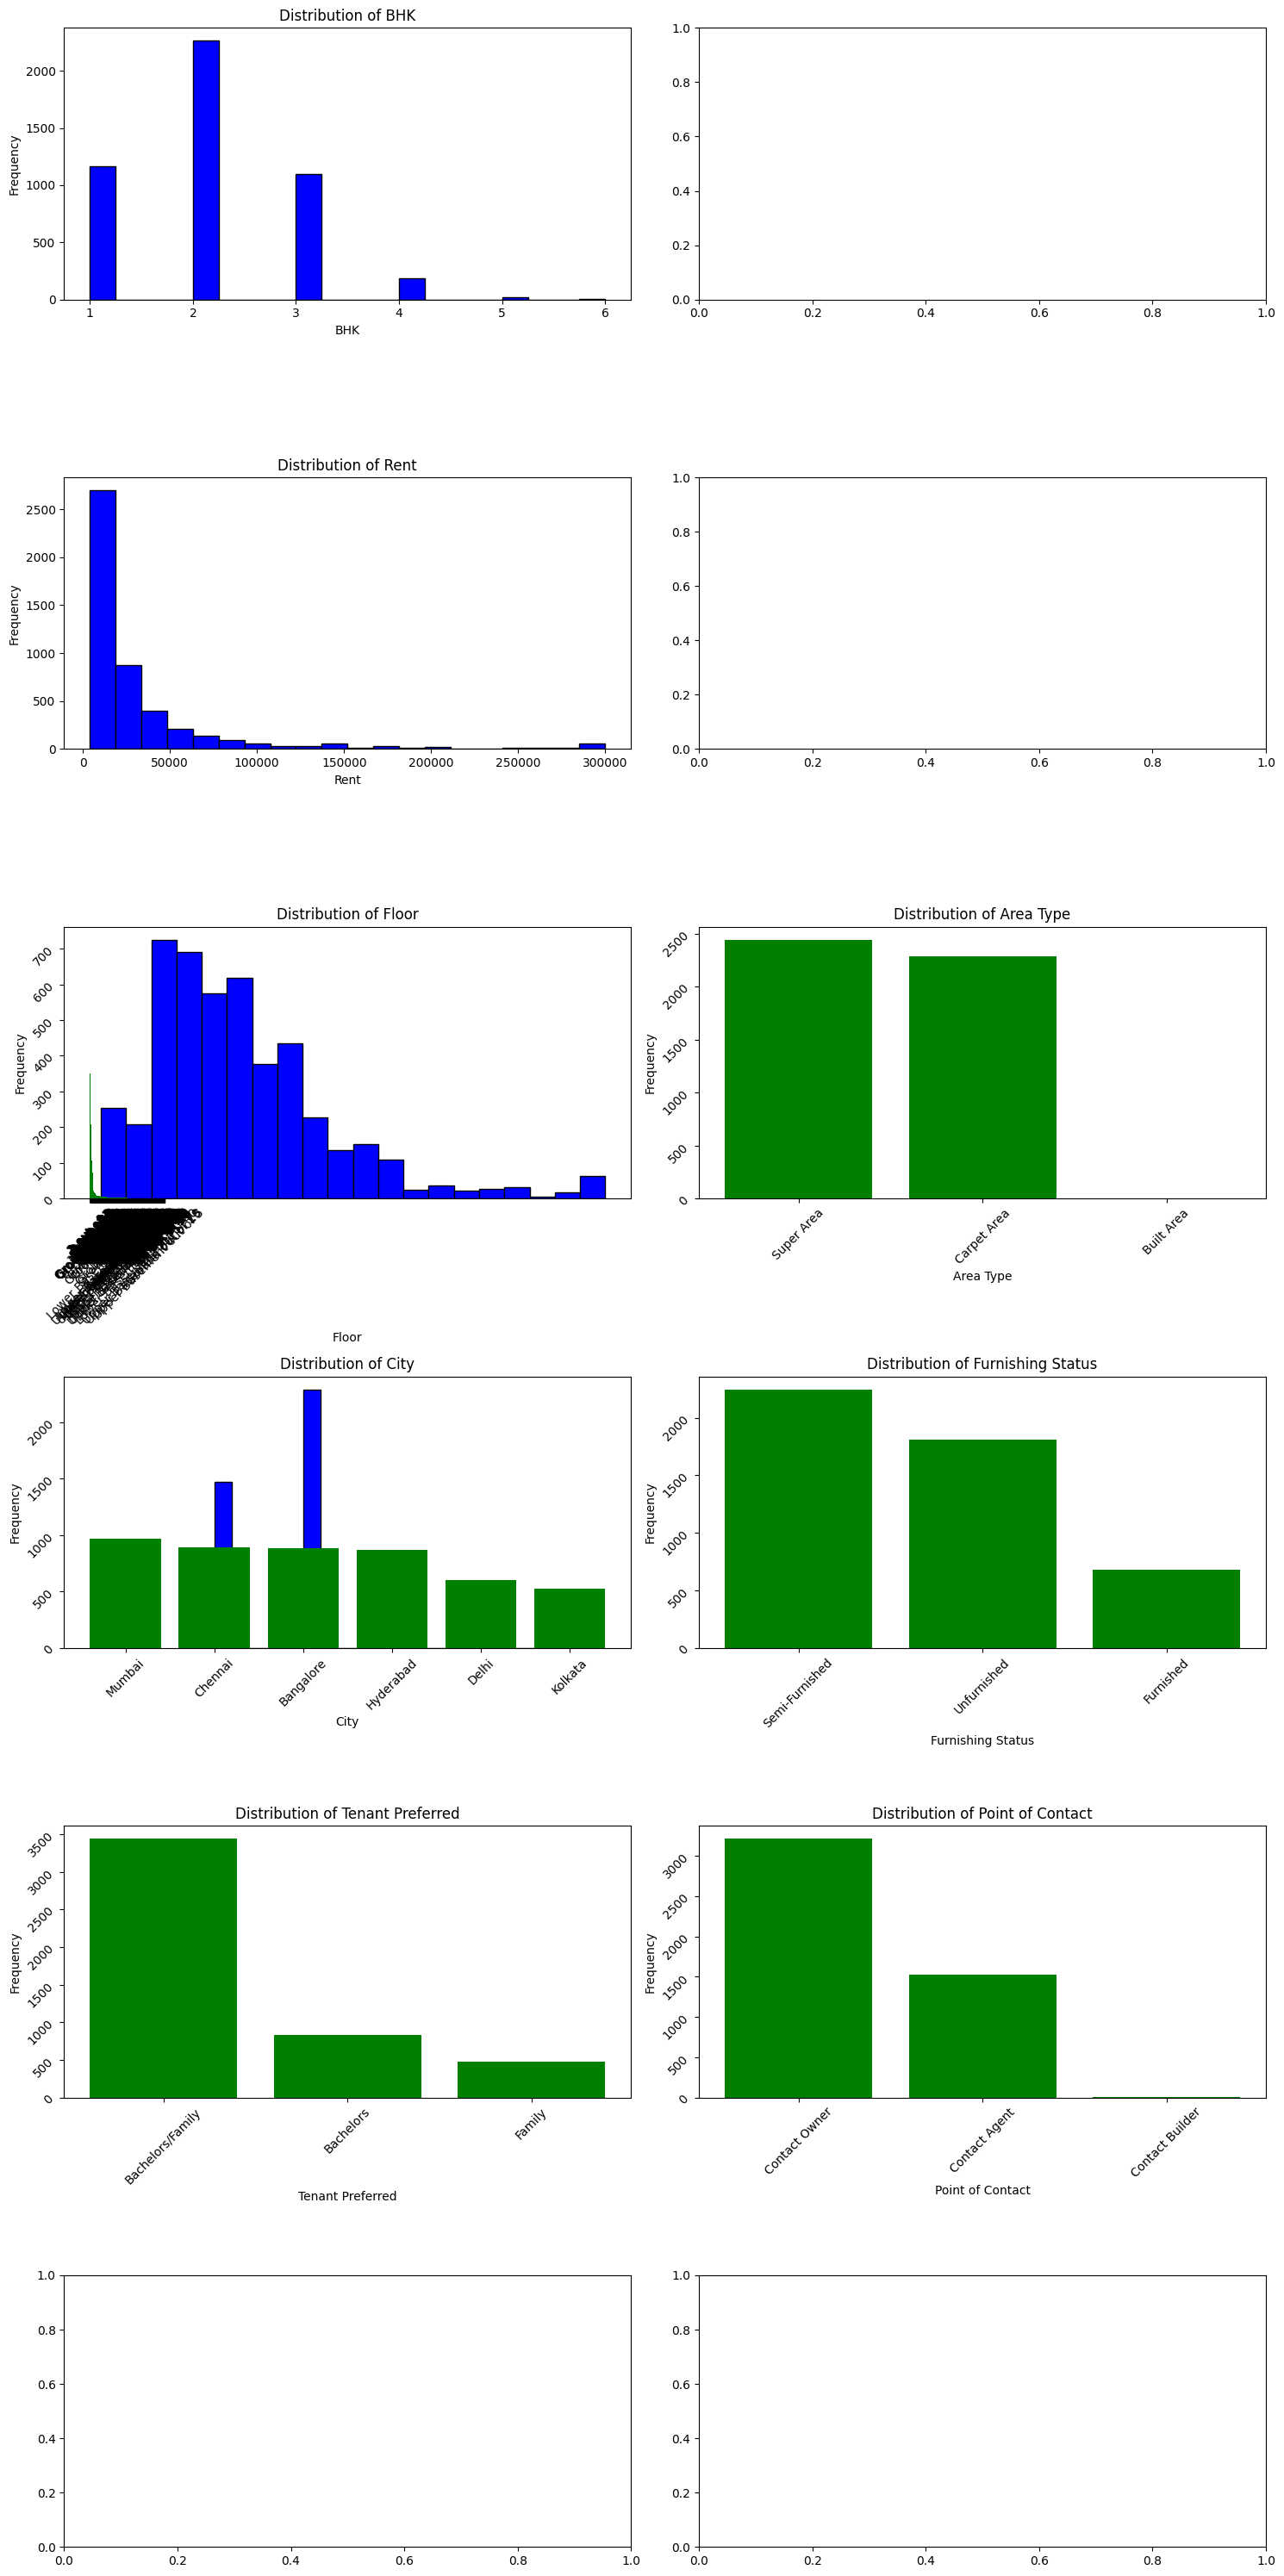

In [ ]:
# write task-3 solution

# Creating a figure and a grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 30))  # Adjust the size and layout based on your needs and number of plots

# Numerical data plotting
num_cols = ['BHK', 'Rent', 'Size', 'Bathroom']
for i, col in enumerate(num_cols):
    axs[i, 0].hist(df[col], bins=20, color='blue', edgecolor='black')
    axs[i, 0].set_title(f'Distribution of {col}')
    axs[i, 0].set_xlabel(col)
    axs[i, 0].set_ylabel('Frequency')

# Categorical data plotting
cat_cols = ['Floor', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
for i, col in enumerate(cat_cols):
    # To fit these plots into our grid, consider the grid layout; some plots might not be plotted if there are more categories than subplots
    row = i // 2 + len(num_cols) // 2  # Adjust starting index based on number of numerical plots
    col_index = i % 2
    value_counts = df[col].value_counts()
    axs[row, col_index].bar(value_counts.index.astype(str), value_counts.values, color='green')
    axs[row, col_index].set_title(f'Distribution of {col}')
    axs[row, col_index].set_xlabel(col)
    axs[row, col_index].set_ylabel('Frequency')
    axs[row, col_index].tick_params(labelrotation=45)  # Rotate labels to prevent overlap

# Adjust layout spacing
plt.tight_layout()
plt.show()


•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

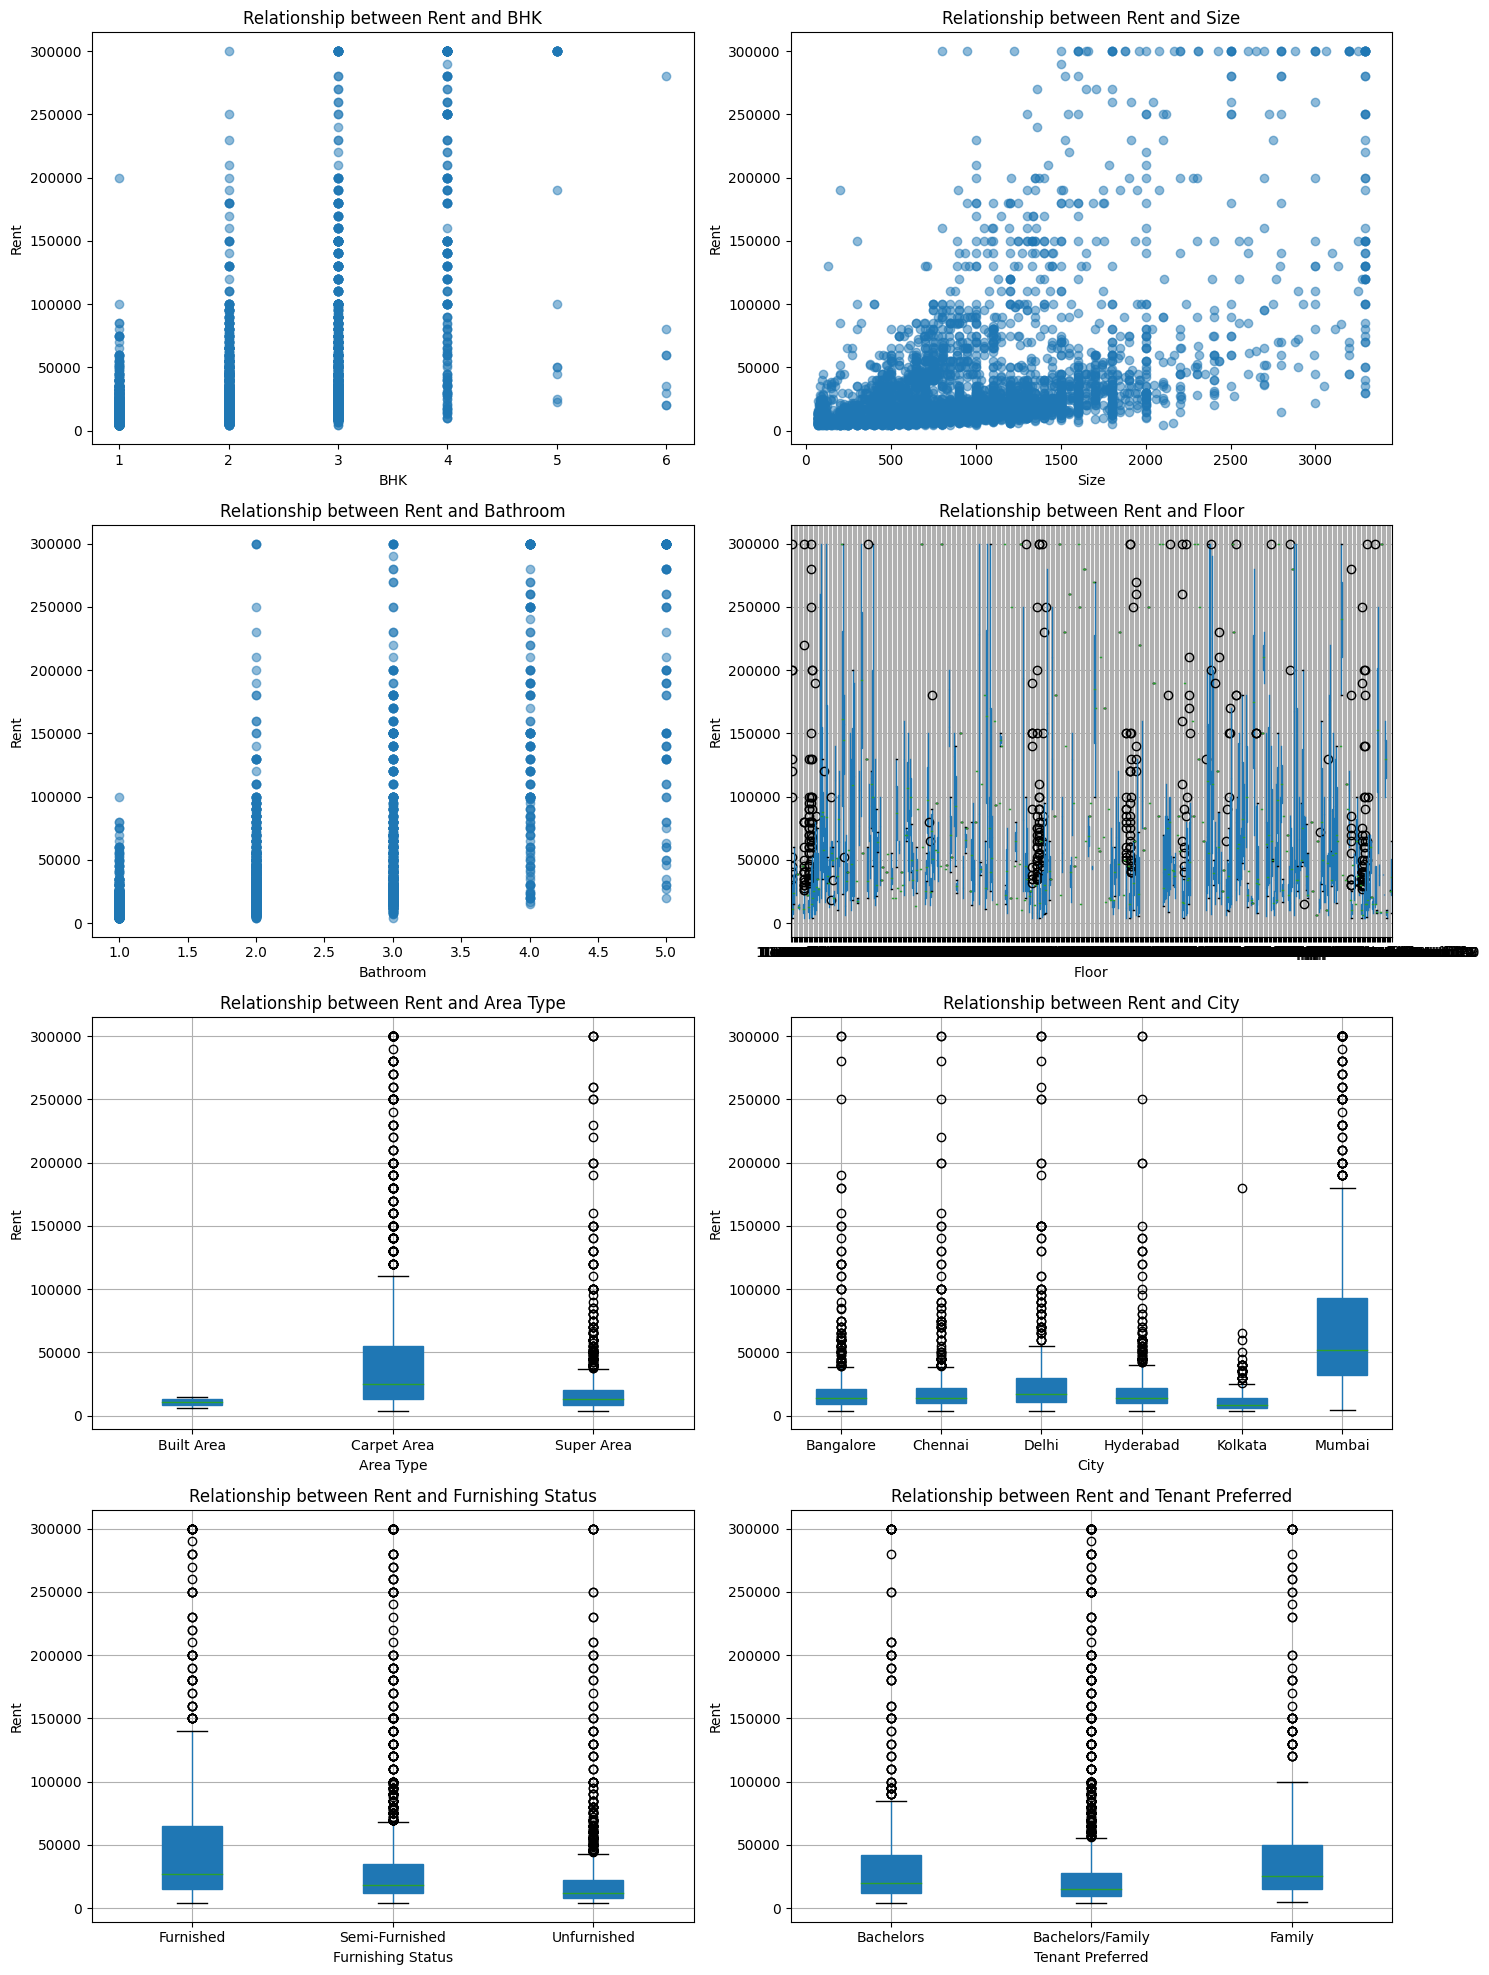

In [ ]:
# write task-4 solution
import matplotlib.pyplot as plt

# Assuming 'Rent' is the target column, and listing other columns you may want to compare.
num_cols = ['BHK', 'Size', 'Bathroom']  # Numerical columns
cat_cols = ['Floor', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']  # Categorical columns

# Creating a figure and a grid of subplots
rows = (len(num_cols) + len(cat_cols) + 1) // 2
fig, axs = plt.subplots(rows, 2, figsize=(15, 5 * rows))

# Counter to keep track of current plot
plot_index = 0

# Plotting scatter plots for numerical columns
for col in num_cols:
    ax = axs[plot_index // 2, plot_index % 2]
    ax.scatter(df[col], df['Rent'], alpha=0.5)
    ax.set_title(f'Relationship between Rent and {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Rent')
    plot_index += 1

# Plotting box plots for categorical columns
for col in cat_cols:
    ax = axs[plot_index // 2, plot_index % 2]
    df.boxplot(column='Rent', by=col, ax=ax, patch_artist=True)
    ax.set_title(f'Relationship between Rent and {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Rent')
    # Handling overlapping title and labels
    plt.suptitle('')  # Suppress the automatic title to fix overlapping
    ax.title.set_position([.5, 1.05])
    plot_index += 1

# Adjust layout spacing
plt.tight_layout()
plt.show()


•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [ ]:
# write task-5 solution

# One-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
categorical_data = encoder.fit_transform(df[['Floor', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']])
categorical_df = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(['Floor', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']))

# Add the encoded columns back to the dataframe and drop original columns
df = df.join(categorical_df).drop(['Floor', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'], axis=1)

from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale, assuming categorical columns are already transformed and original ones dropped
numerical_cols = ['BHK', 'Rent', 'Size', 'Bathroom'] + list(categorical_df.columns)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 321 as the value of the random_state parameter of this function.

In [ ]:
# write task-6 solution
from sklearn.model_selection import train_test_split

# Assume 'df' is your DataFrame and 'Rent' is the target variable.
# First, separate the features (X) and the target (y)
X = df.drop('Rent', axis=1)  # features
y = df['Size']               # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# Outputs the shapes of the splits to understand the size of training and testing datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



NameError: name 'df' is not defined

•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:
import pandas as pd

# Load the dataset from the CSV file
file_path = '/content/drive/MyDrive/python_finalterm /House_Rent_Dataset.csv'
df = pd.read_csv(file_path)

# Verify the structure of the DataFrame
print(df.head())  # Check the first few rows to ensure data is loaded correctly
print(df.info())  # Inspect DataFrame info to understand column types and missing values

# Assuming 'Rent' is the target variable
target_variable = 'Rent'
features = ['BHK', 'Size', 'Bathroom']

# Check if features and target variable exist in the DataFrame
if all(col in df.columns for col in [target_variable] + features):
    # Extract features and target variable
    X = df[features]  # Features
    y = df[target_variable]  # Target variable

    # Split the data into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the Naïve Bayes (GaussianNB) model
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the Naïve Bayes classifier
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the Naïve Bayes classifier: {accuracy:.2f}")
else:
    print("Required columns not found in the DataFrame.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/python_finalterm /House_Rent_Dataset.csv'

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

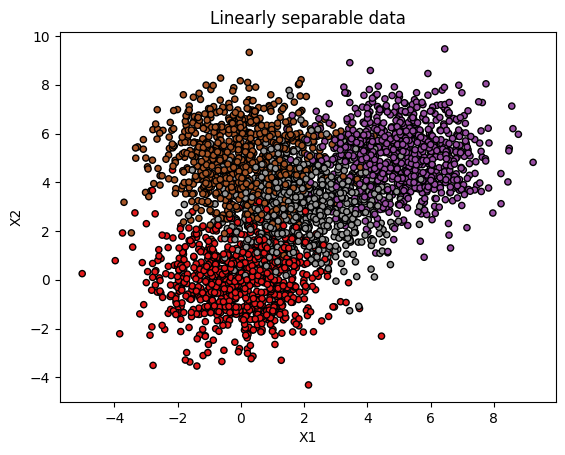

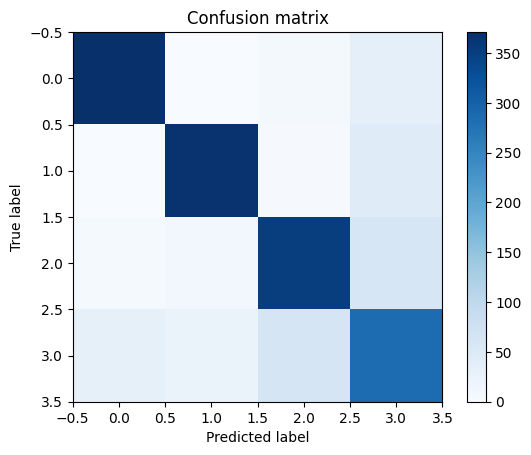

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


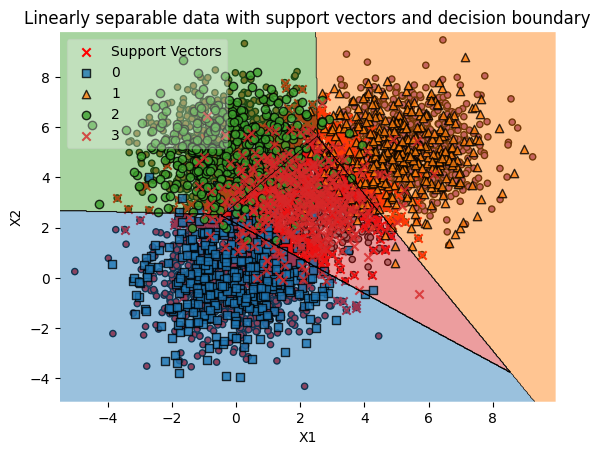

In [ ]:
# Imports
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5), (0,5), (2,3)]
cluster_std = 1.3
frac_test_split = 0.33
num_features_for_samples = 2  # Reduced to 2 for plotting purposes
num_samples_total = 5000

# Generate data
inputs, targets = make_blobs(n_samples=num_samples_total, centers=centers, n_features=num_features_for_samples, cluster_std=cluster_std)
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed)

# Generate scatter plot for training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', s=20)
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf.fit(X_train, y_train)

# Predict labels for test data
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Visualize support vectors and decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', s=20)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color='red', marker='x', label='Support Vectors')
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.title('Linearly separable data with support vectors and decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

•	**Task 9:** Calculate the train and test accuracy of your model and compare them.

In [ ]:
# Imports
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5), (0,5), (2,3)]
cluster_std = 1.3
frac_test_split = 0.33
num_features_for_samples = 2  # Reduced to 2 for plotting purposes
num_samples_total = 5000

# Generate data
inputs, targets = make_blobs(n_samples=num_samples_total, centers=centers, n_features=num_features_for_samples, cluster_std=cluster_std)
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed)

# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf.fit(X_train, y_train)

# Predict labels for train and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)





Train Accuracy: 0.8477611940298507
Test Accuracy: 0.8454545454545455


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [ ]:
# Imports
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5), (0,5), (2,3)]
cluster_std = 1.3
num_features_for_samples = 2  # Reduced to 2 for simplicity
num_samples_total = 5000

# Generate data
inputs, targets = make_blobs(n_samples=num_samples_total, centers=centers, n_features=num_features_for_samples, cluster_std=cluster_std)

# Initialize Naïve Bayes classifier (GaussianNB)
nb_classifier = GaussianNB()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(nb_classifier, inputs, targets, cv=10)

# Report accuracy
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f} +/- {np.std(cv_scores):.4f}")

# Alternatively, you can fit and predict within the cross-validation loop to get individual fold scores
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10, shuffle=True, random_state=42)
# for train_index, test_index in kf.split(inputs):
#     X_train, X_test = inputs[train_index], inputs[test_index]
#     y_train, y_test = targets[train_index], targets[test_index]
#     nb_classifier.fit(X_train, y_train)
#     accuracy = nb_classifier.score(X_test, y_test)
#     print(f"Fold Accuracy: {accuracy:.4f}")

# Note: The dataset splitting and model fitting are handled internally by cross_val_score.
# The results provide an estimate of the model's performance on unseen data.


Cross-Validation Accuracy Scores:
[0.84  0.86  0.852 0.854 0.856 0.854 0.858 0.876 0.822 0.848]
Mean Accuracy: 0.8520 +/- 0.0133
